## Аппроксимация зависимости тока SiPM от напряжения

по данным ноября 2018г

In [1]:
!date
!pwd

Чт янв 10 15:42:21 MSK 2019
/home/sphere/ExpData/2018/Data/2018_12_07-08_run2/spectrums


In [2]:
ydata = [ 0.01,   5.260959,   5.396308,  24.728257, 
         30.622831,  36.058619,  41.530859]
xdata = [ 0.01, -25.780528, -25.783670, -27.975076, 
        -28.385462, -28.809897, -29.240659]

## Экспоненциальное приближение

In [3]:
from symfit import Parameter, Variable, Fit, exp 
import numpy as np 
import matplotlib.pyplot as plt 

x = Variable() 
A = Parameter() 
B = Parameter() 
#sig = Parameter(value=1.4, min=1.0, max=2.0) 
x0 = Parameter() 
# model function
model = A * exp(-B *(x - x0)) 
#model = A * exp(B * x ) 

fit = Fit(model, xdata, ydata) 
fit_result = fit.execute() 
fit_result.params

/home/sphere/Soft/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: It is recommended to provide names to Variable explicitly as automatic generation of names will be dropped in future `symfit` versions.


OrderedDict([('par_0', 0.015339357487257682),
             ('par_1', 0.50774429106013497),
             ('par_2', -13.569451723931062)])

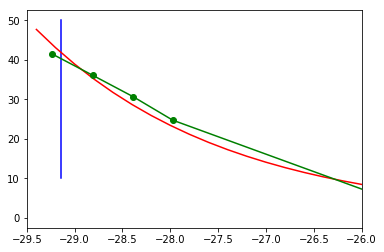

In [4]:
# exponenta fit for voltage
def f(x):
    #return 0.0159 * np.exp(-0.502*(x + 13.4)**1)
    return 0.01534 * np.exp(-0.508*(x + 13.57)**1)

x = [-29.143, -29.143]
y = [10, 50]
plt.plot(x,y,'b-')

t1 = np.arange(-29.4, 0, 0.2)
plt.plot(t1, f(t1), 'r-')

plt.plot(xdata, ydata, 'go-') 

plt.xlim(-29.5,-26)
plt.show() 

In [5]:
2.048/4095*3740

1.8704566544566545

In [6]:
-27.24 - 1.9

-29.139999999999997

### Линейная аппроксимация

In [7]:
y = [ 24.728257, 30.622831,  36.058619,  41.530859]
x = [ -27.975076, -28.385462, -28.809897, -29.240659]

In [8]:
import scipy as sp
from scipy.optimize import fsolve

fp, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)
f = sp.poly1d(fp)
print(f)

 
-13.23 x - 345


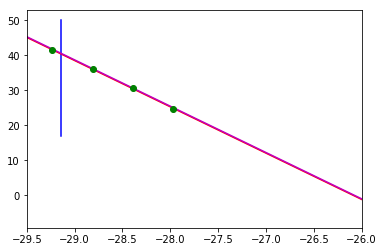

In [9]:
# linear fit for voltage
def flin(x):
    #return -10.32 * x - 261.7
    return -13.23 * x - 345

x = [-29.143, -29.143]
y = [17, 50]
plt.plot(x,y,'b-')

t1 = np.arange(-29.5,-25.5,0.1)
plt.plot(t1, f(t1),    'r-')
plt.plot(t1, flin(t1), 'm-')

plt.plot(xdata, ydata, 'go') 

plt.xlim(-29.5,-26)
plt.show() 

## Результат

В диапазоне от -27.0 до -29.5 В можно использовать линейное приближение:

I(U) = -13.23 * U - 345